In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
def plot_data(path, estilo="d"):
    '''
    :param path: Arquivo com os dados. Ex: ITUB.csv
    :param estilo: d=diario, s=semanal, m=mensal.
    :return: Histograma com as linhas em verde significando um desvio padrao e a vermelha significando a média.
    '''
    data = pd.read_csv(path)
    t = data.shape[0]
    if estilo=="d":
        valores_d = []
        for i in range(t):
            p = np.log(data["Close"][i]/data["Open"][i])
            valores_d.append(float(p))
    elif estilo=="s":
        valores_d = []
        for i in range(7, t):
            p = np.log(data["Close"][i]/data["Open"][i-7])
            valores_d.append(float(p))
    elif estilo=="m":
        valores_d = []
        for i in range(30, t):
            p = np.log(data["Close"][i]/data["Open"][i-30])
            valores_d.append(float(p))

    # Calculando media e desvio padrao
    mean = np.mean(valores_d)
    std_dev = np.std(valores_d)
    plt.hist(valores_d, bins=20)
    test_norm = sp.stats.shapiro(valores_d)
    if estilo=="d":
        plt.title(f"Diário: {path[:-4]} 2015-2020")
    elif estilo=="s":
        plt.title(f"Semanal: {path[:-4]} 2015-2020")
    elif estilo=="m":
        plt.title(f"Mensal: {path[:-4]} 2015-2020")
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Média')

    # Calcular os limites superior e inferior do desvio padrão
    upper_bound = mean + std_dev
    lower_bound = mean - std_dev

    # Adicionar linhas verticais para os limites do desvio padrão
    plt.axvline(upper_bound, color='g', linestyle='dashed', linewidth=2, label='Desvio Padrão')
    plt.axvline(lower_bound, color='g', linestyle='dashed', linewidth=2)

    # Teste de normalidade
    print(f"Teste de normalidade Shapiro Wilk: {test_norm}")

Teste de normalidade Shapiro Wilk: ShapiroResult(statistic=0.9884149432182312, pvalue=1.9716392074542455e-08)


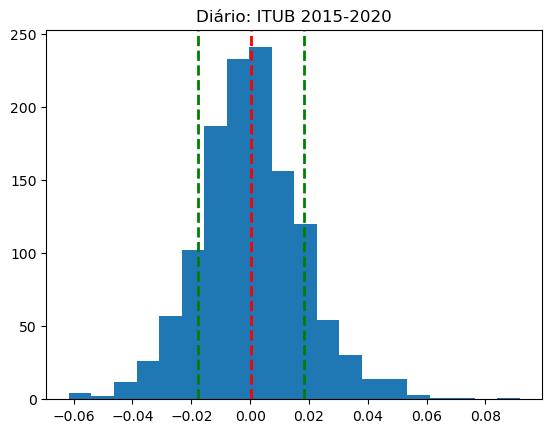

In [5]:
plot_data("ITUB.csv", estilo="d")